In [1]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt

# 7 - Sweep and two term Qubit Hamiltonian

In previous tutorials, we simulated the dynamics of a single qubit with a single term in its Hamiltonian and explained the `compute` function and parameter sweep.
In this tutorial, we use again a single qubit but with two terms in its Hamiltonian.
As you will see below, we don't need to change any part of the existing single term simulation, but we simply add a new term to our qubit.

Here, we will evolve a qubit under the unitary dynamics of the Hamiltonian $H=\frac{1}{2}f_{z}\sigma_{z} + f_{x}\sigma_{x} = f_{z}J_{z} + f_{x}\sigma_{x}$ with the initial state set to the equal superposition of $|1\rangle$ and $|0\rangle$.
We also set the total simulation time (with `simTotalTime`) and the step size (`simStepSize`) as well as the frequency sweep and the `compute` function where we compute the expectation value of $\sigma_{x}$.

In [2]:
# create the qubit and set its initial state and frequency
qub = qg.Qubit(frequency = 1)
qub.initialState = [1, 0]

# set the simulation time and step size
qub.simTotalTime = 8*np.pi
qub.simStepSize = 0.1

# create the operators for which we compute the expectation values
sigmaX = qg.sigmax()

# write a compute function that takes two arguments: (i) a quantum-system (qsys) and (ii) a state
# compute whatever we want and store in .results
def compute(qsys, state):
    qsys.results['sigmax expectation'].append(qg.expectation(sigmaX, state))

# set the compute attribute of our qubit to compute function
qub.compute = compute

# create a sweep for the qubit frequency
freqSweep = qub.simulation.Sweep.createSweep(system=qub, sweepKey="frequency", sweepList=np.arange(-1, 1, 0.02))

Now, the only thing needed is to add the second term of the Hamiltonian to our qubit.
We do this by calling the `addTerm` method as explained in previous tutorials, and the rest is the same.

In [3]:
secondTerm = qub.addTerm(qg.sigmax, frequency=1)

At this point, all the essential information are set, and we can run the simulation by `qub.runSimulation()`.
We again set `simDelState = True` (to discard the states) and `p = True` (for multi-processing of the sweep).

In [4]:
qub.simDelStates = True
states = qub.runSimulation(p=True)

Now, we receive the `results` that we stored again as `qub.results['sigmax expectation']`, but this time it returns a list of list, each of which is a time trace corresponding to the frequencies swept.

As expected, the expectation value of $\sigma_{x}$ oscillates with different frequencies.

Text(0, 0.5, 'Time')

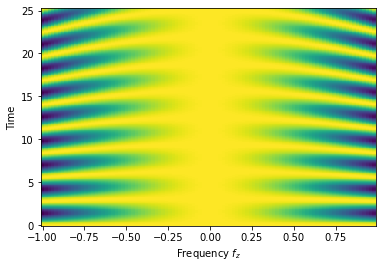

In [5]:
Y, X = np.meshgrid(qub.simulation.timeList, freqSweep.sweepList)
plt.pcolormesh(X, Y, qub.results['sigmax expectation'])

plt.xlabel("Frequency $f_{z}$")
plt.ylabel("Time")